We will now extend the previous work in 1D to two dimension. The discretized partial derivatives simply become the same finite differences, but only operating on a single index at a time.

The 2D convection equation becomes:

$$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c \frac{\partial u}{\partial y} $$

As in one dimension, the time derivative will be discretized with a forward Euler scheme, and the spatial derivatives will be discretized with a backward difference.

Adding the second index and discretizing results in:

$$ \frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0 $$

Solving for the desired quantity gives:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation for the following initial condition:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and the following boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Variable declarations
nx = 81
ny = 81
nt = 100
c = 1
sigma = 0.2
L = 2.
dx = L/(nx-1)
dy = L/(ny-1)
dt = sigma*dx if dx < dy else sigma*dy

In [3]:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)

In [4]:
u = np.ones((ny, nx))

In [5]:
# Set initial conditions
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

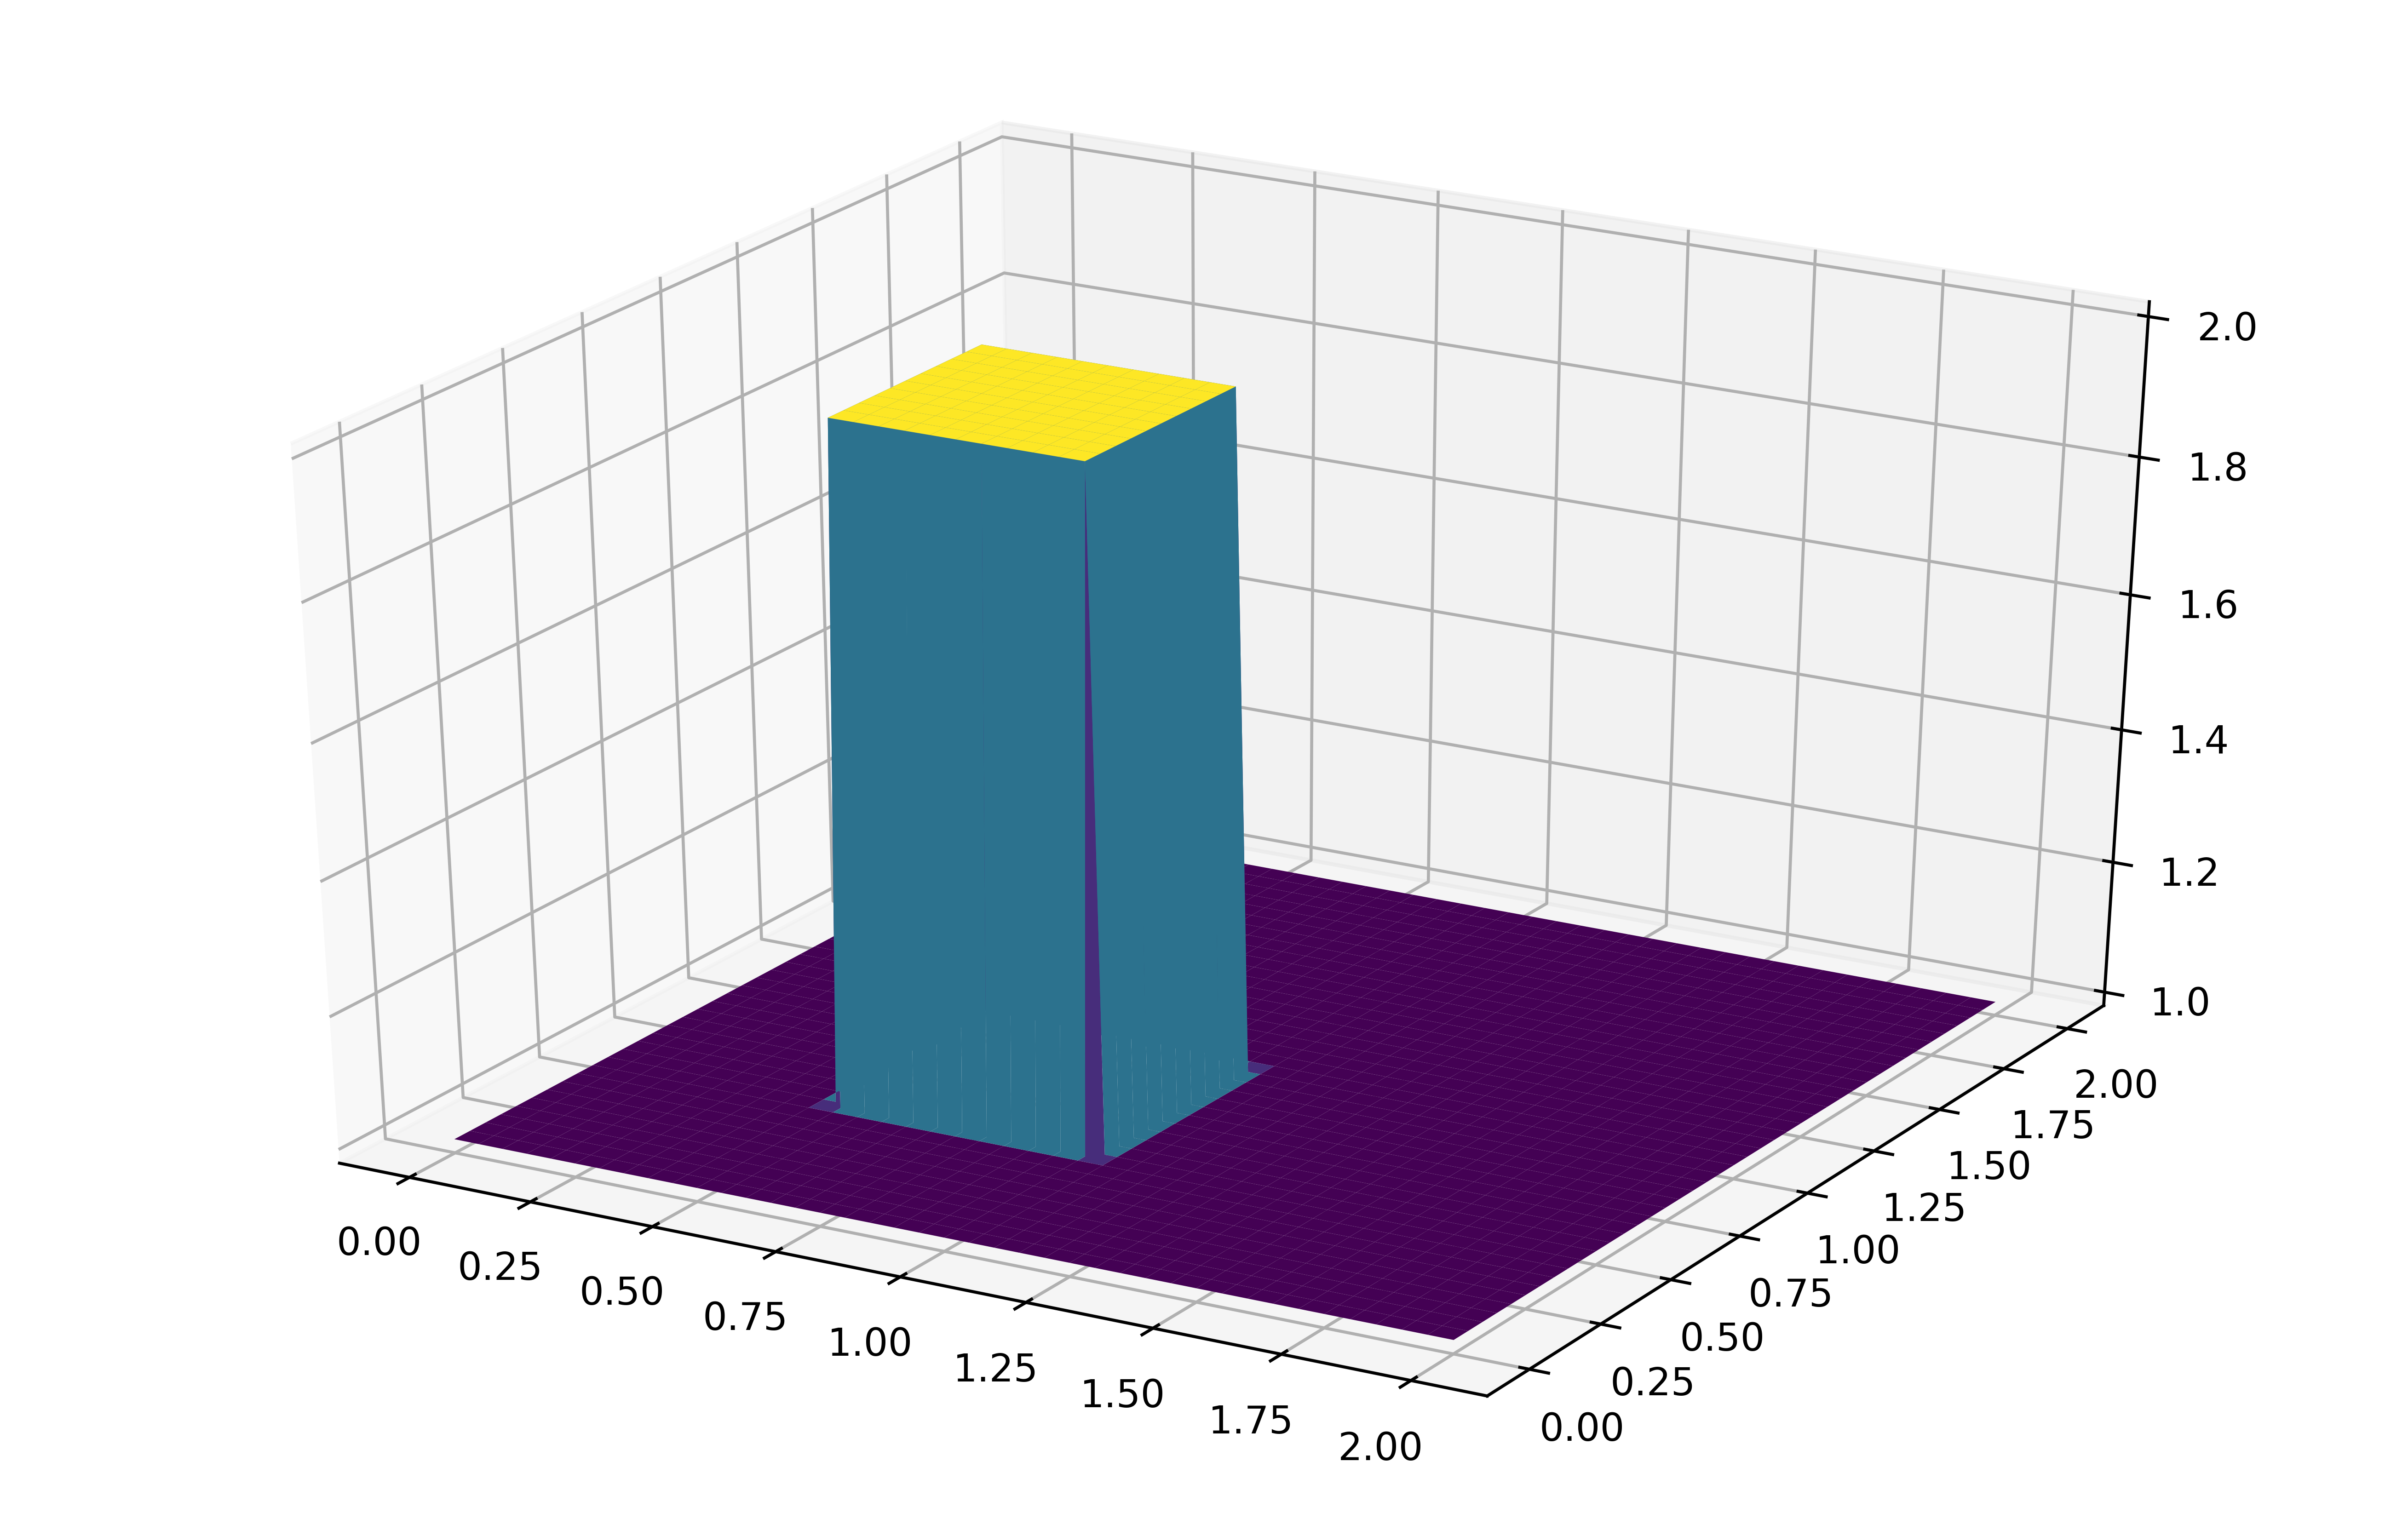

In [6]:
# Plot the initial condition
fig = plt.figure(figsize=(11,7), dpi=300)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

In [7]:
## MAIN LOOP ##
for n in range(nt+1): # time
    un = np.copy(u)
    row, col = u.shape
    for j in range(1, row): # y-index, excluding boundaries
        for i in range(1, col): # x-axis, excluding boundaries
            u[j, i] = un[j, i] - c*dt/dx*(un[j, i] - un[j, i-1]) - c*dt/dy*(un[j, i] - un[j-1, i])
            u[0, :] = 1.
            u[-1, :] = 1.
            u[:, 0] = 1.
            u[:, -1] = 1.

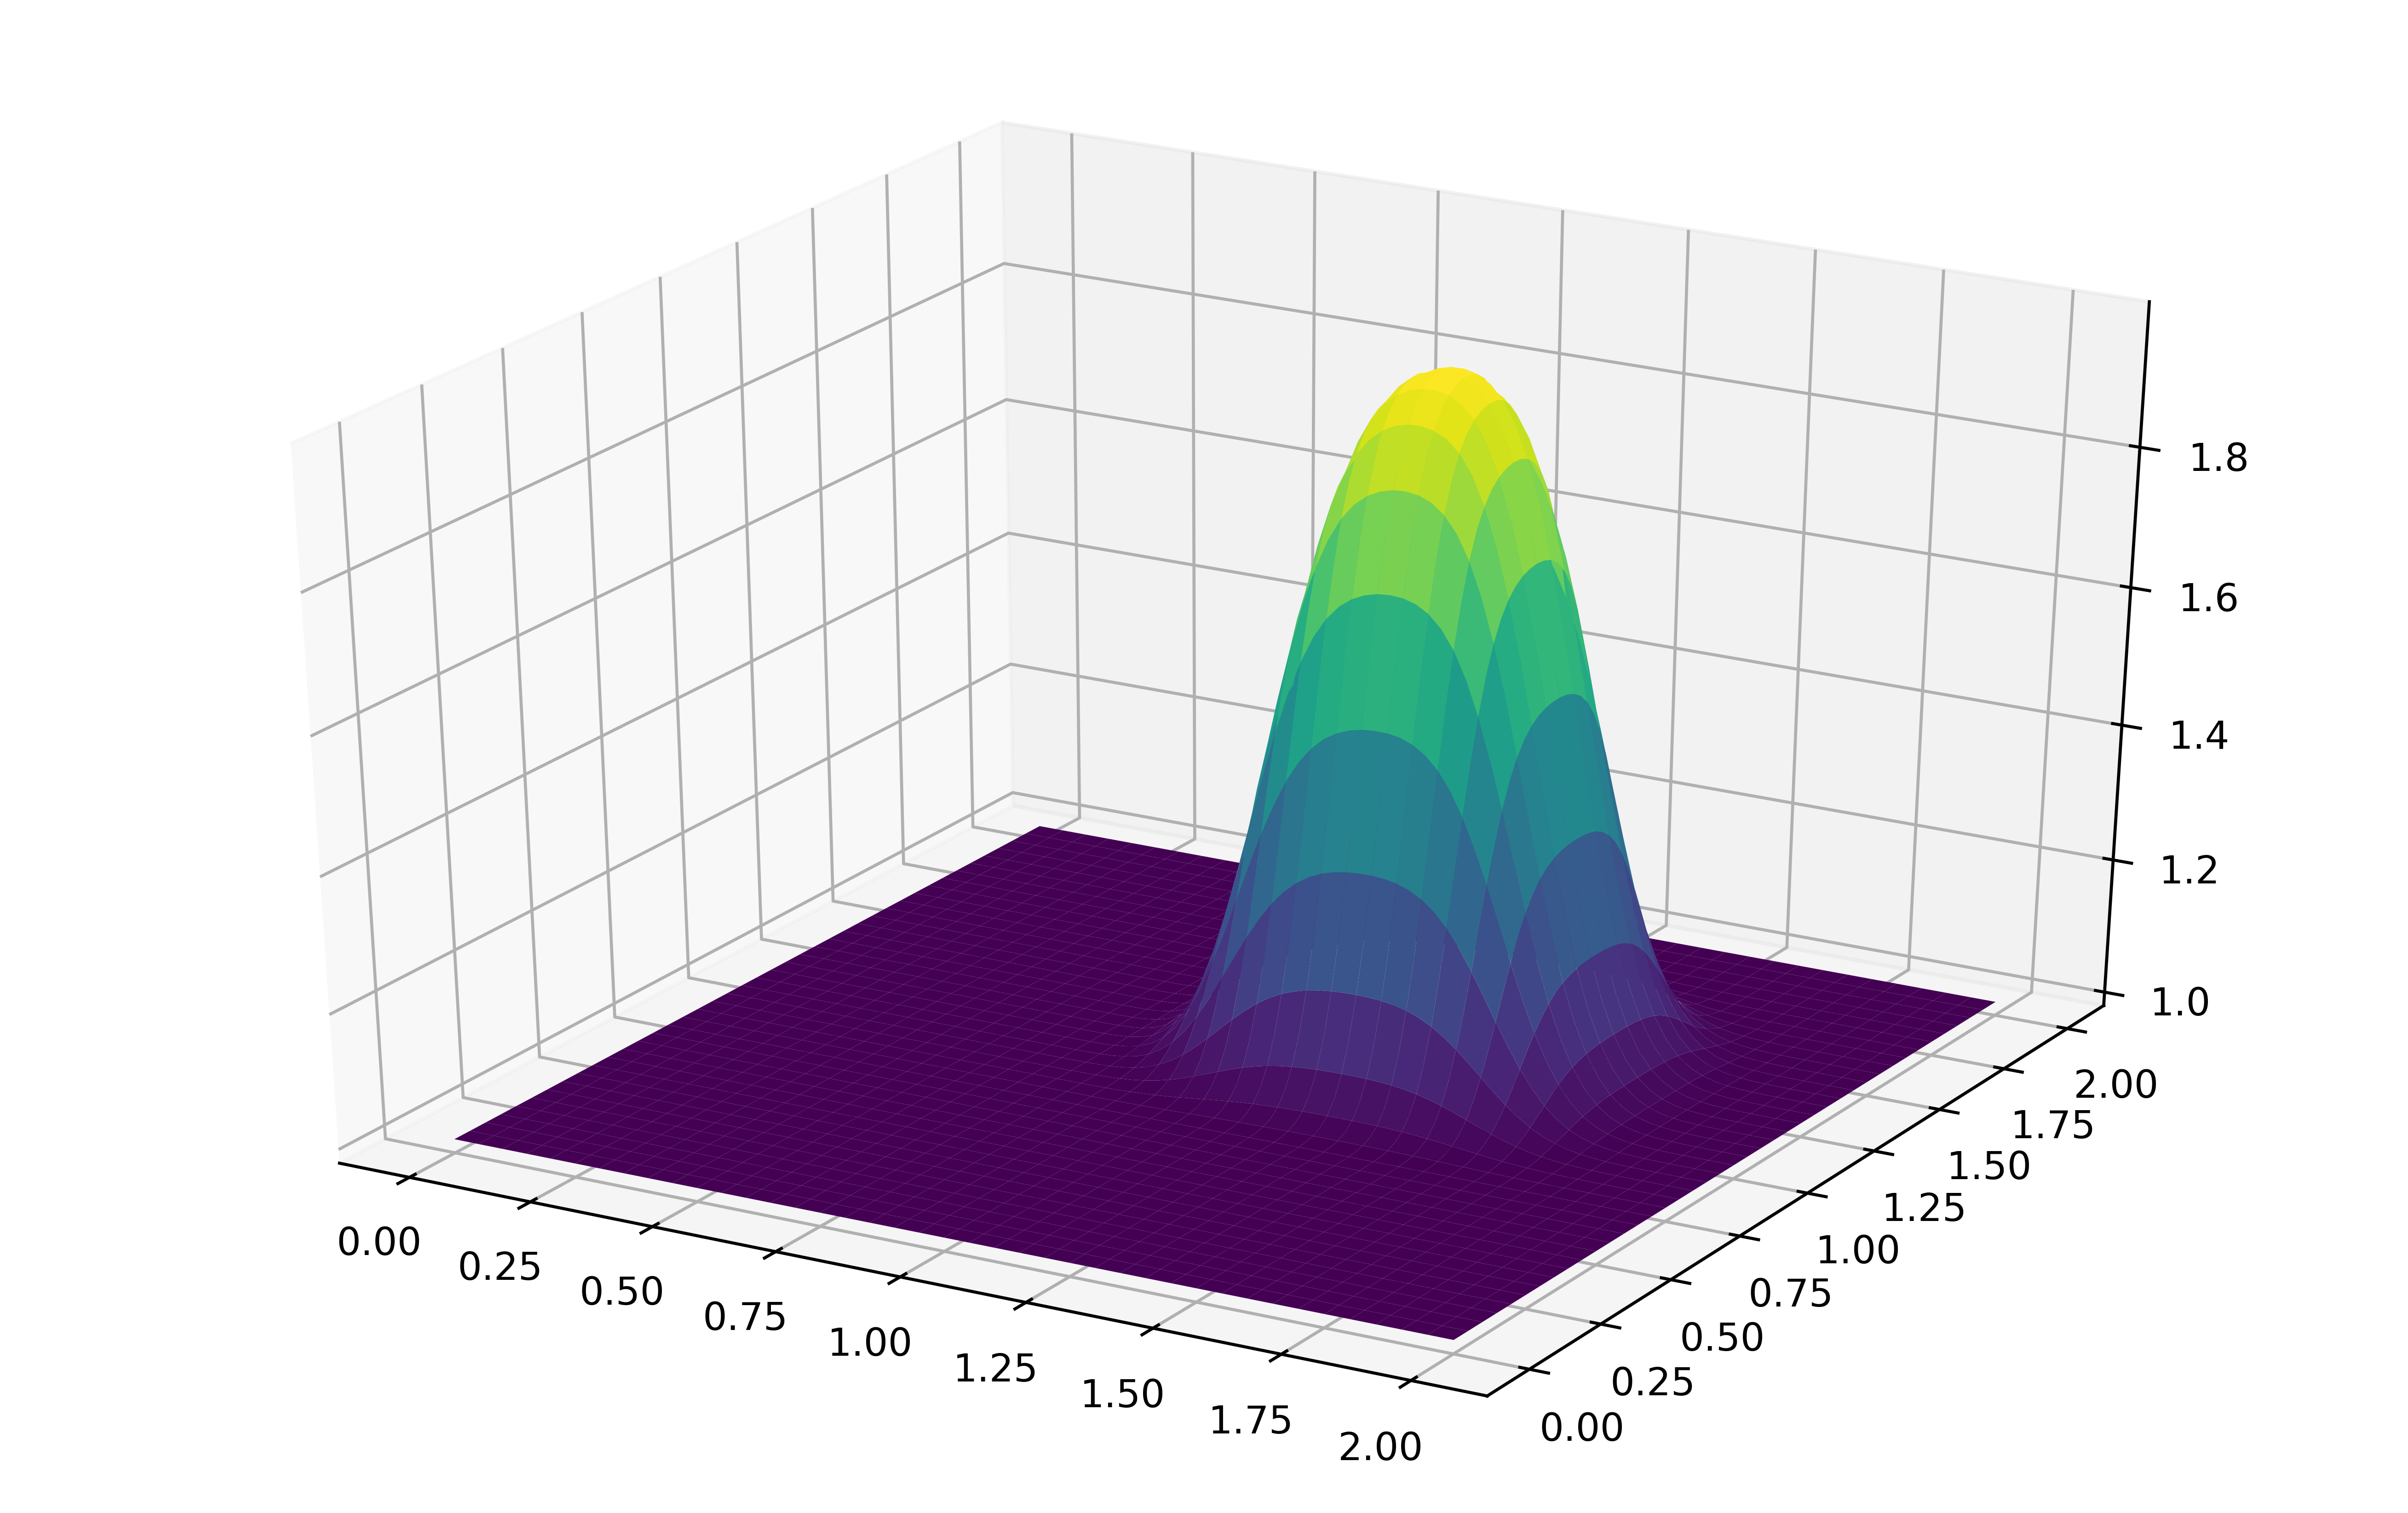

In [8]:
fig = plt.figure(figsize=(11, 7), dpi=300)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

# Using array operations

The above code was a little slow with the embedded for loops. It is possible instead to use NumPy's element-wise array operations to perform the calculations.

In [12]:
u = np.ones((ny, nx))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
un = np.copy(u)

for n in range(nt+1):
    un = np.copy(u)
    u[1:, 1:] = un[1:, 1:] - c*dt/dx*(un[1:, 1:] - un[1:, :-1]) - c*dt/dy*(un[1:, 1:] - un[:-1, 1:])

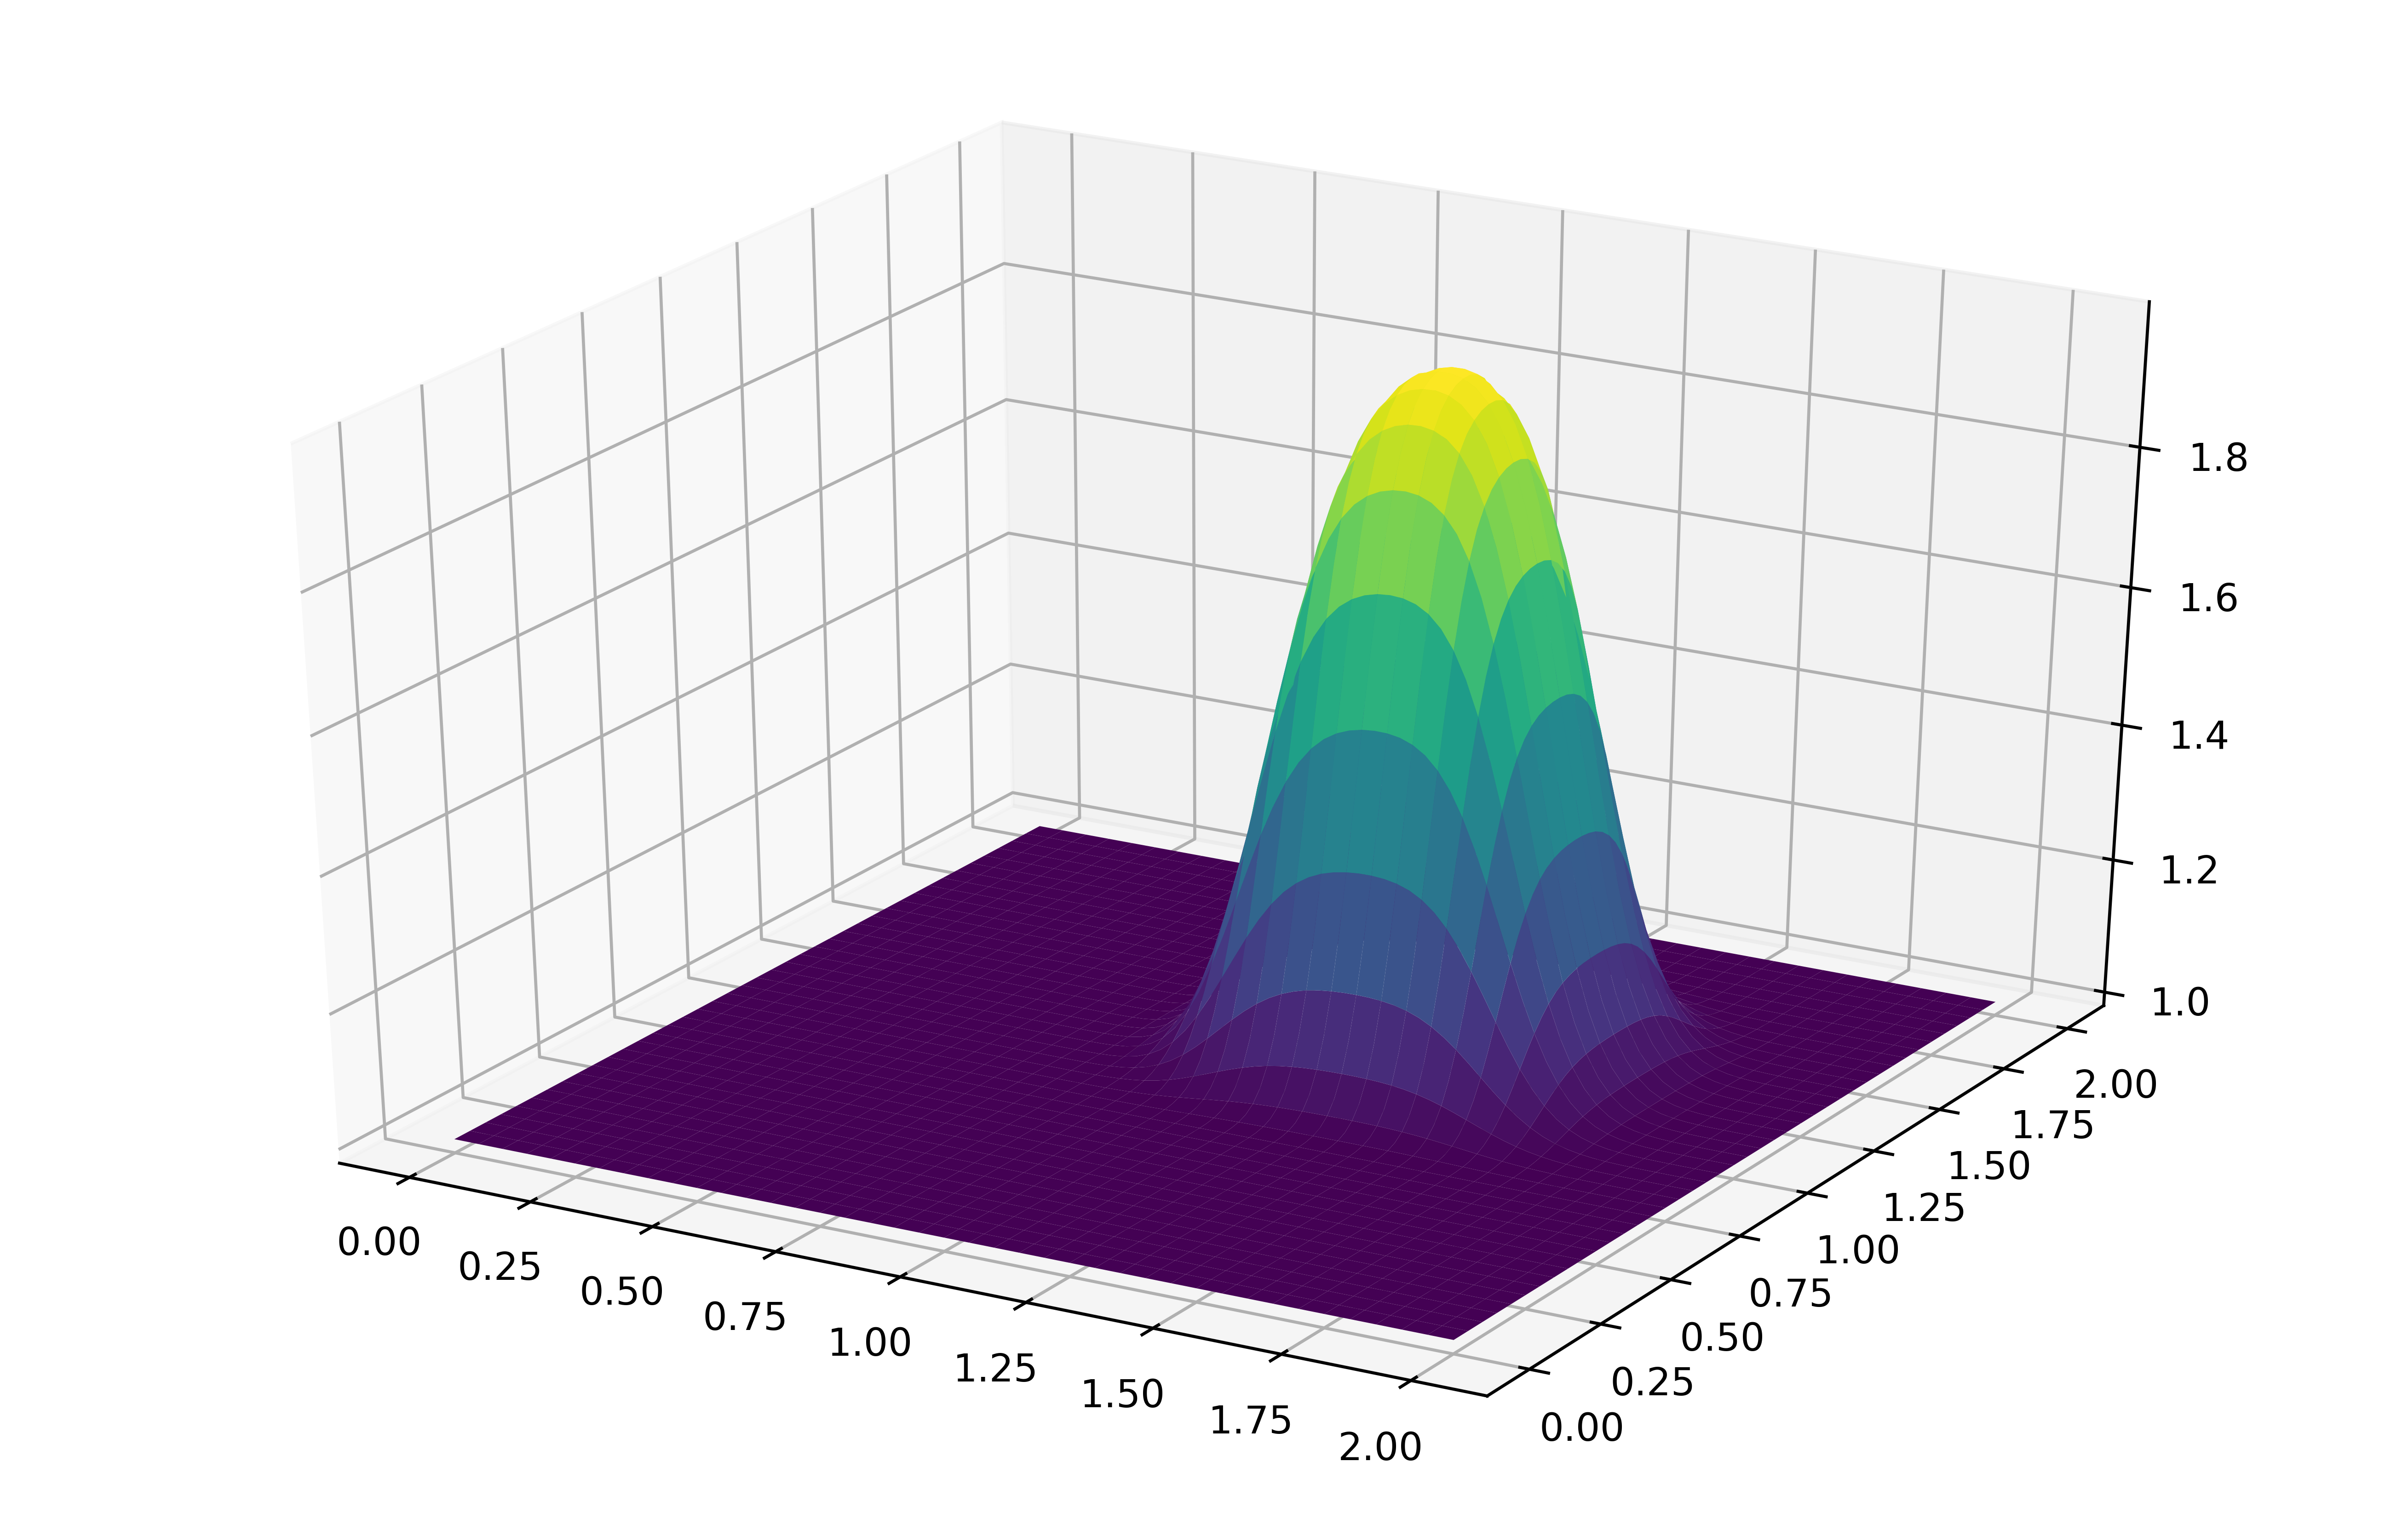

In [13]:
fig = plt.figure(figsize=(11, 7), dpi=300)
ax = fig.gca(projection='3d')
surf3 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

# Nonlinear convection

It is not a far cry now to extend nonlinear convection into 2 dimensions. 2D nonlinear convection can be written as:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these as before:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Solving for the next time step gives:

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

In [14]:
# Variable declarations
nx = 101
ny = 101
nt = 80
c = 1
sigma = 0.2
L = 2.
dx = L/(nx-1)
dy = L/(ny-1)
dt = sigma*dx if dx < dy else sigma*dy

In [29]:
def initialize():
    u = np.ones((ny, nx))
    v = np.ones((ny, nx))
    un = np.ones((ny, nx))
    vn = np.ones((ny, nx))
    u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
    v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
    return u, v, un, vn

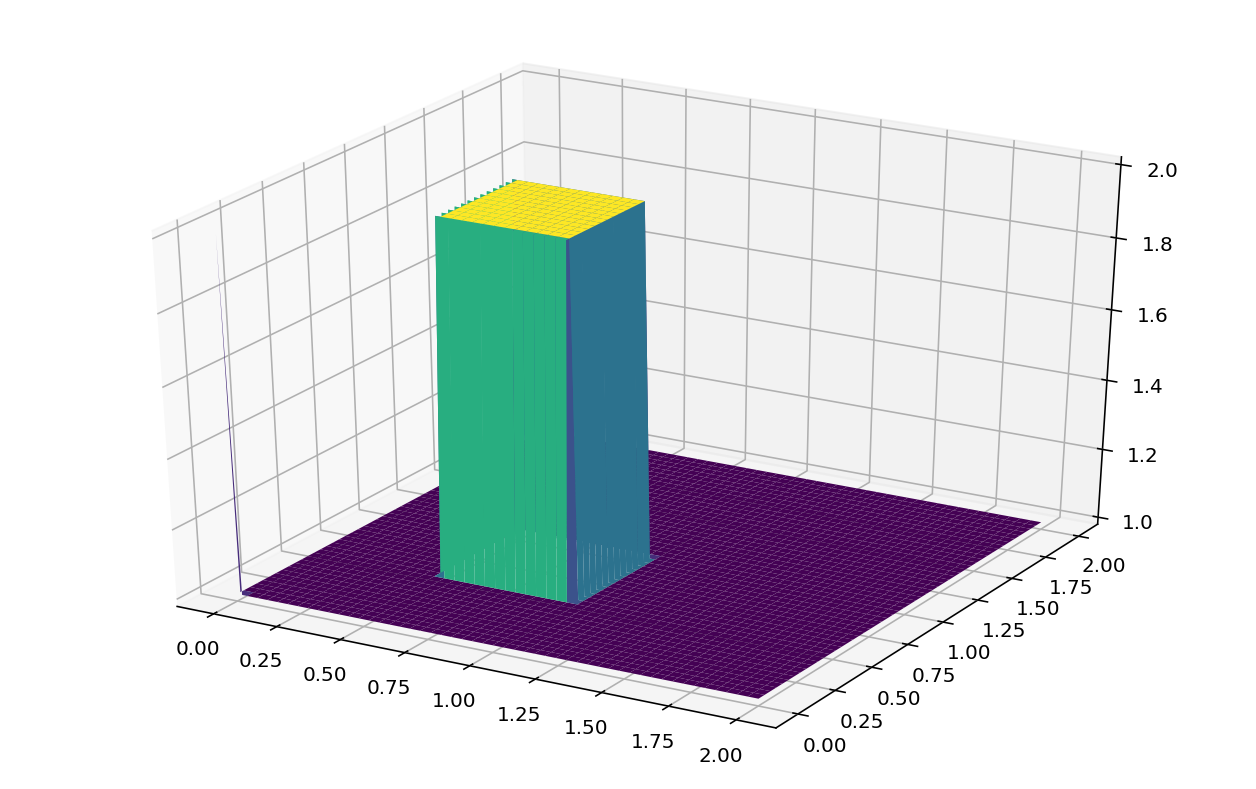

In [22]:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
plt.show()

In [32]:
## MAIN LOOP ##
u, v, un, vn = initialize() 
for n in range(nt):
    un = np.copy(u)
    vn = np.copy(v)
    
    u[1:, 1:] = un[1:, 1:] - un[1:, 1:]*dt/dx*(un[1:, 1:]-un[1:, :-1]) - vn[1:, 1:]*dt/dy*(un[1:, 1:] - un[:-1, 1:])
    v[1:, 1:] = vn[1:, 1:] - un[1:, 1:]*dt/dx*(vn[1:, 1:]-vn[1:, :-1]) - vn[1:, 1:]*dt/dy*(vn[1:, 1:] - vn[:-1, 1:])
    
    u[:, 0] = 1      # x = 0
    u[:, -1] = 1     # x = L
    u[0, :] = 1      # y = 0
    u[-1, :] = 1     # y = L
    v[:, 0] = 1      # x = 0
    v[:, -1] = 1     # x = L
    v[0, :] = 1      # y = 0
    v[-1, :] = 1     # y = L

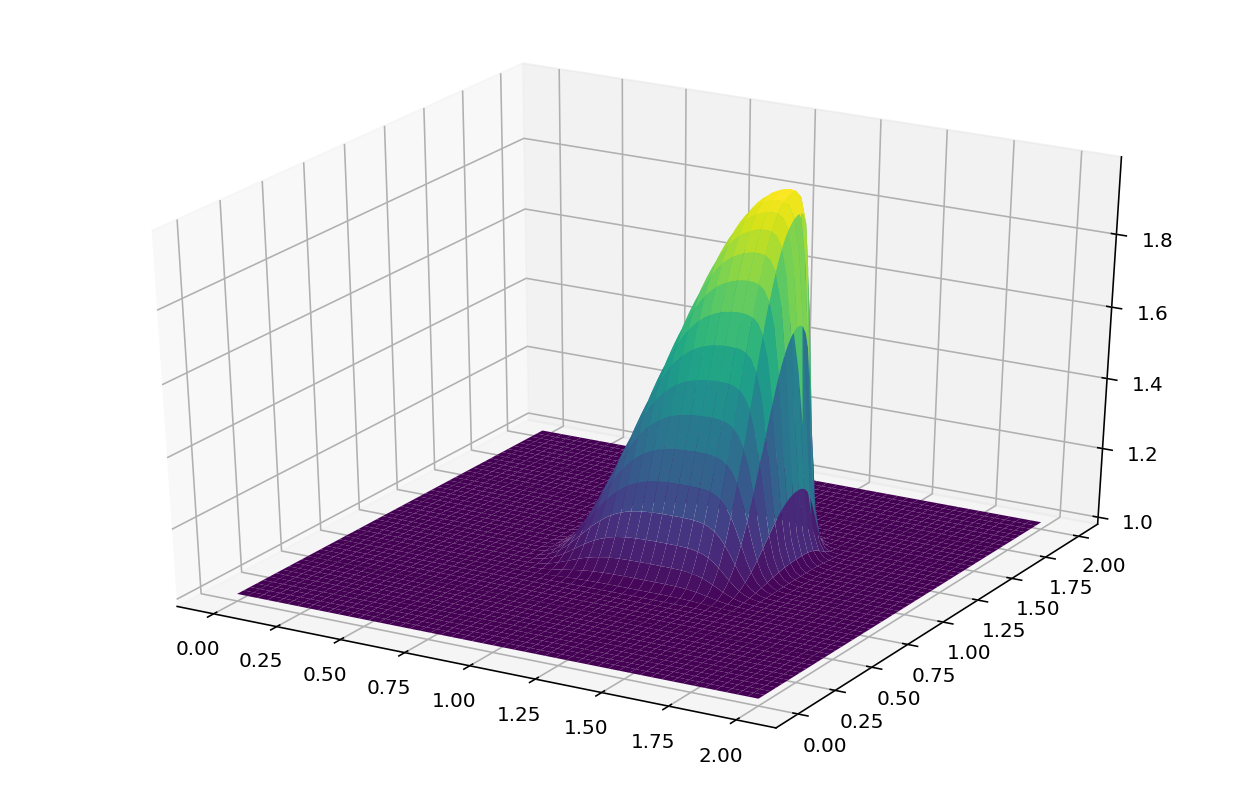

In [33]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)

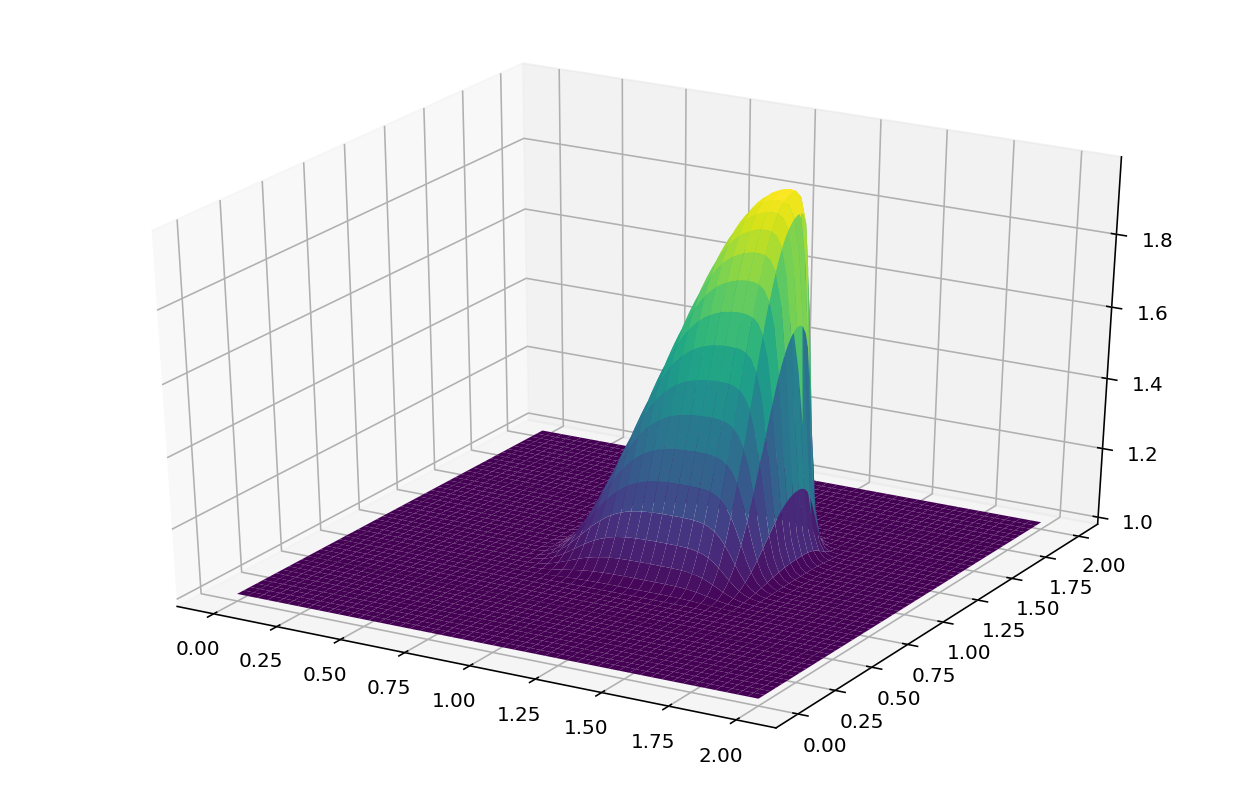

In [34]:
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)

In [35]:
nums = np.arange(11)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
nums[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])